In [1]:
#https://www.investopedia.com/terms/b/bollingerbands.asp
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib notebook

C:\Users\s2007\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start='2014-1-1'
end='2016-3-31'
smoothing_period = 20 #default 20
sd = 2

In [3]:
df = data.DataReader('AAPL', 'yahoo', start, end)
 
df['BOLU'] = df['Close'].rolling(window=smoothing_period).mean() + sd * df['Close'].rolling(window=smoothing_period).std()
df['BOLD'] = df['Close'].rolling(window=smoothing_period).mean() - sd * df['Close'].rolling(window=smoothing_period).std()
df['SMA'] = df['Close'].rolling(window=smoothing_period).mean()
df['%b'] = ( df['Close'] - df['BOLD'] ) / ( df['BOLU'] - df['BOLD'] )
df['band_width'] = ( df['BOLU'] - df['BOLD'] ) / df['SMA']

#Uses for %b include system building and pattern recognition. 
#Uses for bandwidth include identification of opportunities arising from relative extremes in volatility and trend identification.

<IPython.core.display.Javascript object>


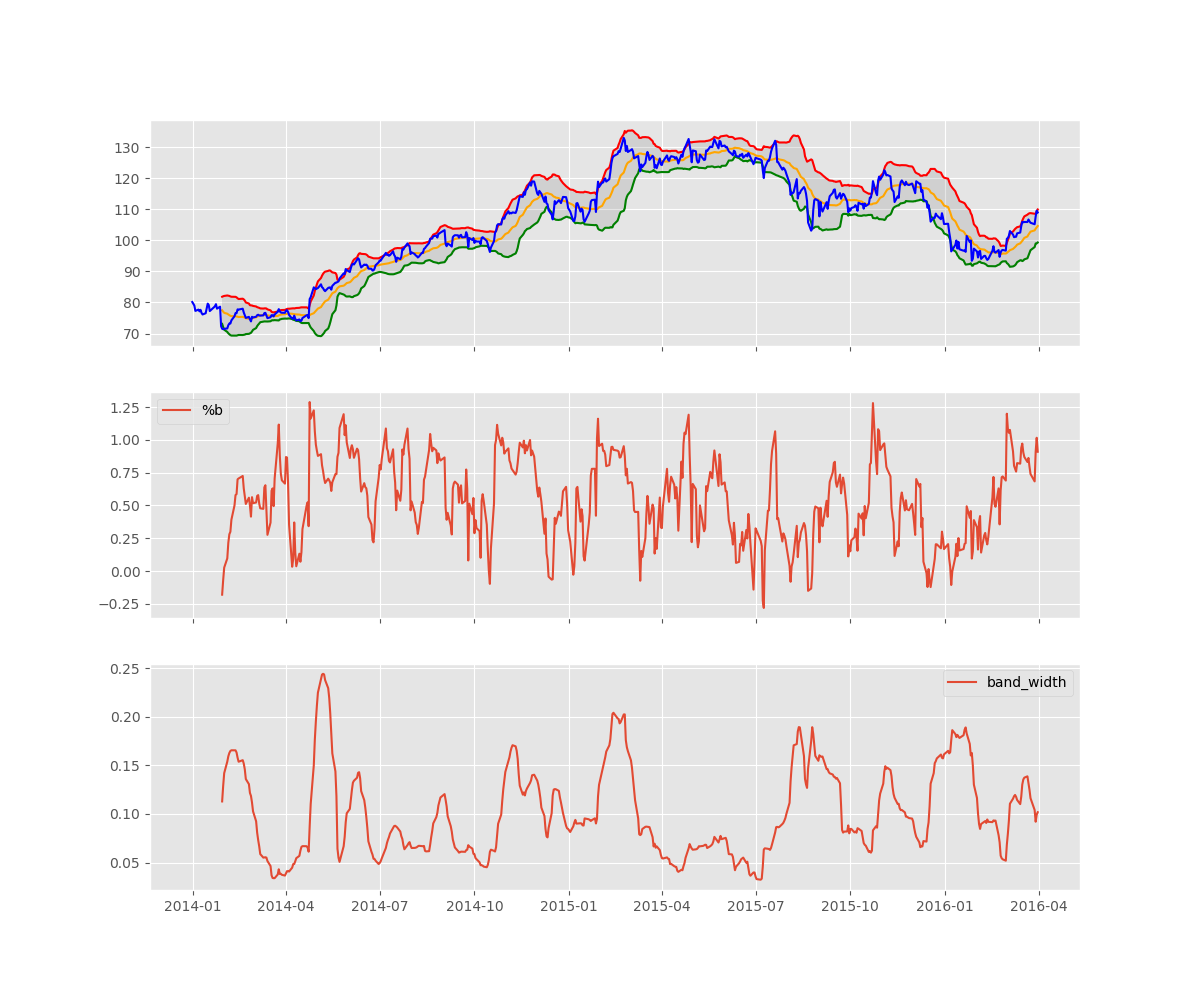

In [4]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(12,10), sharex=True)

ax1.plot(df.index, df['SMA'], color='orange')
ax1.plot(df.index, df['BOLU'], color='red')
ax1.plot(df.index, df['BOLD'], color='green')
ax1.plot(df.index, df['Close'], color='blue')
ax1.fill_between(df.index, df['BOLU'], df['BOLD'], alpha=0.2, color='grey')

ax2.plot(df.index, df['%b'], label='%b')

ax3.plot(df.index, df['band_width'], label='band_width')

ax2.legend()
ax3.legend()
plt.show()